# Домашнее задание "Продвинутая линейная алгебра".

### Уровень 0:

In [35]:
import numpy as np
from math import sin, cos
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!


In [3]:
# a) Диагональная, ортогональная, но не единичная(!)
A = np.array([[cos(0),0],
              [0,-cos(0)]])
AT = A.transpose()
A.dot(AT)


array([[1., 0.],
       [0., 1.]])

In [4]:
# b) Верхнетреугольная, ортогональная
B = np.array([[cos(0),sin(0)],
              [0,cos(0)]])
print(B)
BT = B.transpose()
B.dot(BT)

[[1. 0.]
 [0. 1.]]


array([[1., 0.],
       [0., 1.]])

In [5]:
# c) Нижнетреугольная, ортогональная
C = np.array([[cos(0),0],
              [sin(0),cos(0)]])
print(B)
BT = B.transpose()
B.dot(BT)

[[1. 0.]
 [0. 1.]]


array([[1., 0.],
       [0., 1.]])

In [6]:
# d) Матрица, у которой определитель = 1, и все элементы не равны 0
D = np.array([[5,8],
              [3,5]])
det = np.linalg.det(D)
print(D)
print(det)

[[5 8]
 [3 5]]
1.0000000000000009


Найдите собственные значения и собственные вектора матриц:

```
m = np.array([[2, 2],
              [1, 3]])
print(m)
```

In [7]:
m = np.array([[2, 2],
              [1, 3]])
w, v = np.linalg.eig(m)

for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


### Уровень 1:


Найдите спектральное разложение матрицы:

```
m = np.array([[1, 2],
              [2,3]])
print(m)
```


In [8]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [19]:
w, v = np.linalg.eig(m)

print('Разложенная форма: ', w.shape, v.shape)
print('Характеристическое значение: ', w)
print('Векторная матрица элементов: ', v)

smat= np.diag(w)
print(smat)

# Проверка разложения по собственным значениям

result = np.allclose(m, np.dot(v, np.dot(smat, np.linalg.inv(v)))) # Сравнить каждый элемент двух матриц и вернуть True, если они совпадают
 
print('Проверить разложение по собственному значению: ', result)

Разложенная форма:  (2,) (2, 2)
Характеристическое значение:  [-0.23606798  4.23606798]
Векторная матрица элементов:  [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]
[[-0.23606798  0.        ]
 [ 0.          4.23606798]]
Проверить разложение по собственному значению:  True


Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*




In [30]:
X, y = load_digits(return_X_y=True)
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


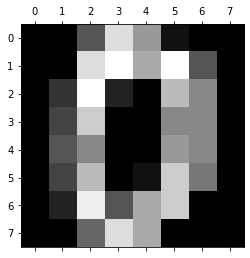

In [31]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [32]:
U, s, V = np.linalg.svd(image)
n_component = 3
S = np.diag(s)[:, :n_component]
V = V[:n_component, :]
A = U.dot(S.dot(V))
print(A)

[[ 0.         -0.78915039  4.6072616  13.18671497  8.75196474  1.55225353
   0.19517043  0.        ]
 [ 0.          1.8295334  15.30377312 13.85622048 11.17903904 12.2133446
   4.5853553   0.        ]
 [ 0.          4.08305805 13.26541401  1.91491465  0.95151283 11.96647896
   8.72017126  0.        ]
 [ 0.          3.69090463 10.62463431  0.6499009  -0.55160228  9.50246662
   8.09265487  0.        ]
 [ 0.          3.41393976  9.39019464  0.14814706 -0.98255576  8.41010288
   7.51201481  0.        ]
 [ 0.          3.5451115  11.81970326 -0.08127523  0.75370344 11.44320684
   6.77482966  0.        ]
 [ 0.          1.15120714 13.03391062  5.53201105  9.41069424 13.22168131
   0.13807054  0.        ]
 [ 0.         -0.86786105  4.73921281 13.73914497  9.18886927  1.58573959
   0.07443357  0.        ]]


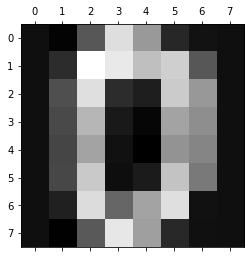

In [33]:
plt.matshow(A, cmap = 'gray')

In [36]:
rf_original = RandomForestClassifier(oob_score=True)
rf_original.fit(X, y)
rf_original.oob_score_

0.9699499165275459

In [37]:
svd = TruncatedSVD(n_components=16)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.8479587526955916

In [38]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.9649415692821369


--------------------------------------------------------------------------------

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации.
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
